In [1]:
import pandas as pd

# Read in the data
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

save_path = 'C:\\Users\\aoife\Documents\\Project\\'

# Read in normalisaed data

df = pd.read_csv(folder_path + 'minmax_normalised_data.csv')


print(df.head(5))

                          participantId  bodyMass_kg  height_m       bmi  \
0  00a55fb5-da33-4e2e-ae61-28f589fcc174     0.080718  0.578971  0.101313   
1  00fd4039-9b5e-4bbb-8295-4983a3f58371     0.094290  0.606985  0.107675   
2  02d5125e-684f-4166-a3b7-5df1bcfc1661     0.094290  0.625662  0.101342   
3  080292d4-a0b0-4dd7-a7dd-191c8ac71664     0.121435  0.663015  0.116226   
4  080bacc1-4661-4735-acca-7d27ad1a4192     0.142863  0.663015  0.136735   

   mean_hr/s  hr_duration_(s)   max_hr   min_hr  totalSteps  steps_per_hour  \
0   0.359606         0.000544  0.44575  0.25425    0.018714        0.079119   
1   0.322549         0.000475  0.37925  0.28750    0.000256        0.004787   
2   0.276816         0.000741  0.44575  0.15425    0.045336        0.060711   
3   0.264010         0.002037  0.49175  0.21250    0.016046        0.054701   
4   0.294799         0.000833  0.47075  0.22500    0.053504        0.099917   

   ...  wake_up_choices  wake_ups  weekly_naps  noise_light  stress_

In [2]:
# Train test split

from sklearn.model_selection import GroupKFold, GridSearchCV

gkf = GroupKFold(n_splits=10)


In [3]:
# X - features

X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','steps_per_hour','totalDistance','dist_per_hour', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values

# y - target
y = df['ssq_score'].values

groups = df['participantId'].values

In [4]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, max_iter=1000)


# Lists to store evaluation metrics
train_rmse_scores = []
test_rmse_scores = []
train_predicted_vals = []
train_actual_vals = []
test_predicted_vals = []
test_actual_vals = []




In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Train model with gkf

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups = groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    mlp.fit(X_train, y_train)

    train_pred = mlp.predict(X_train)
    test_pred = mlp.predict(X_test)

    train_rmse = mean_squared_error(y_train, train_pred, squared=False)

    train_rmse_scores.append(train_rmse)

    test_rmse = mean_squared_error(y_test, test_pred, squared=False)

    test_rmse_scores.append(test_rmse)

    train_predicted_vals.extend(train_pred)
    train_actual_vals.extend(y_train)

    print(f"Train actual values: {y_train}, train predicted values: {train_pred}")

    test_predicted_vals.extend(test_pred)
    test_actual_vals.extend(y_test)

    print(f"Test actual values: {y_test}, test predicted values: {test_pred}")

    print(f"\nLength of train predicted values: {len(train_predicted_vals)}, length of train actual values: {len(train_actual_vals)}\n")

    print(f"\nLength of test predicted values: {len(test_predicted_vals)}, length of test actual values: {len(test_actual_vals)}\n")
    
    print(f'Fold {i+1}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')

# Average scores
avg_train_rmse = np.mean(train_rmse_scores)
avg_test_rmse = np.mean(test_rmse_scores)

print("Average Train RMSE:", avg_train_rmse)
print("Average Test RMSE: ", avg_test_rmse)


Train actual values: [0.5  0.75 0.75 0.75 0.5  0.5  0.75 0.5  1.   1.   0.75 0.25 0.5  0.5
 0.   0.5  1.   0.5  0.5  0.5  0.75 0.75 1.   0.75 1.   0.25 1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.5
 0.25 0.5  0.75 0.5  0.5  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.5  0.5
 0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.75 0.75 0.5
 0.75 0.75 0.5  0.75 0.75 1.   1.   0.75 0.75 0.75 1.   1.   0.75 1.
 1.   0.75 0.5  0.5  1.   0.75 0.5  1.   0.75 1.   0.75 0.75 1.   1.
 0.75 0.75 0.75 0.5  0.75 1.   1.   0.5  1.   0.75 1.   0.5  0.75 1.
 0.5  0.5  0.75 1.   0.5  0.75 0.75 0.75 1.   1.   1.   0.5  0.75 0.75
 1.   0.75 0.5  0.25 1.   0.5  1.   0.75 1.   0.5  0.75 0.5  0.5  0.75
 0.5  1.   0.5  0.75 0.75 0.75 0.5  0.75 0.25 1.   0.75 0.75 0.5  0.75
 0.5  0.5  0.75 0.5  1.   0.75 1.   0.25 0.25 0.75 0.75 0.75 0.75 0.5
 0.75 0.5  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 1.   0.25
 0.75 0.75 0.75 0.5  0.75 0.75 0.75 0.75 0.75 0.   0.5  0.75 0.   0.5

In [6]:
print(np.array(train_actual_vals).shape)
print(np.array(train_predicted_vals).shape)
print(np.array(test_actual_vals).shape)
print(np.array(test_predicted_vals).shape)


(5976,)
(5976,)
(664,)
(664,)


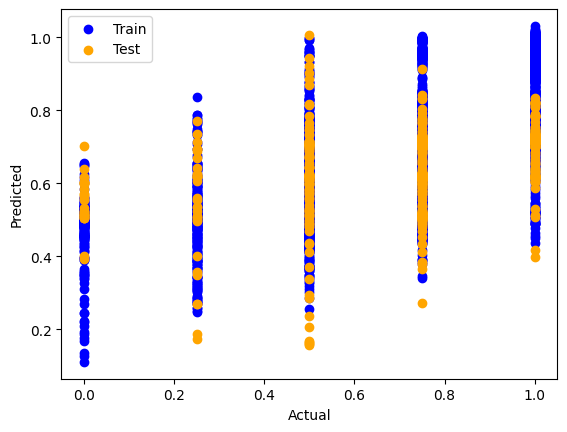

In [7]:
# Plot the results

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train', color = 'blue')
plt.scatter(test_actual_vals, test_predicted_vals, label = 'Test', color = 'orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



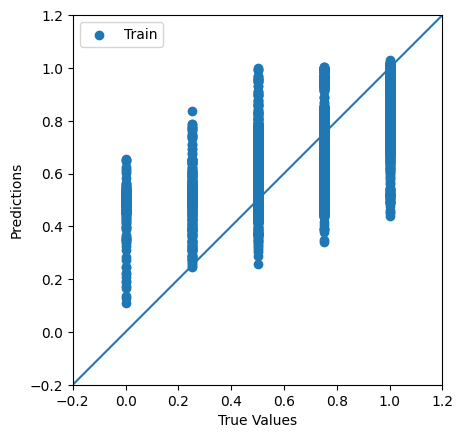

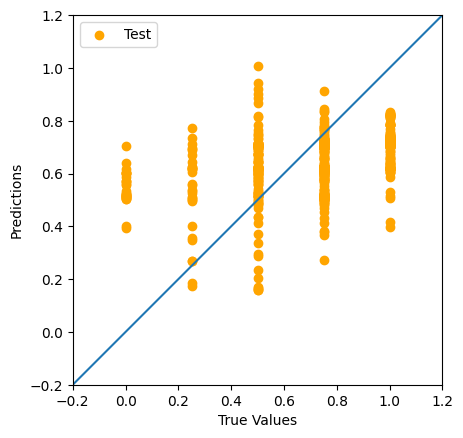

In [8]:
# Plot the results

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


# Plot the results

import matplotlib.pyplot as plt

plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()
